<a href="https://colab.research.google.com/github/wassima-manssour/DL-breast-cancer-detection/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is focused on Convolutional Neural Networks (CNN) for classification as a supervised network. The goal is to provide a technical introduction for executing CNN for medical imaging, highlighting some key features to consider when working with medical images.

In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
 #import the json file containing the token downloaded from kaggle account
 from google.colab import files
 files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wassimamanssour","key":"321ae3273f3a01190865dc61d4199f64"}'}

In [3]:
#create a kaggle folder
! mkdir ~/.kaggle

In [4]:
# copy the kaggle.json to the folder created
! cp kaggle.json ~/.kaggle/

In [5]:
# permession for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# list all datasets in kaggle
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                         Diabetes Dataset                                      9KB  2022-10-06 08:55:25           2843         86  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset           COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           2447         70  1.0              
evangower/premier-league-matches-19922022                     Premier League Matches 1992-2022                     78KB  2022-10-03 02:18:33           1054         43  1.0              
whenamancodes/student-performance                             Student 

In [9]:
! kaggle kernels output utkarshsaxenadn/breast-cancer-image-segmentation-attention-unet -p /path/to/dest

Output file downloaded to /path/to/dest/AttentionCustomUNet.h5
Kernel log downloaded to /path/to/dest/breast-cancer-image-segmentation-attention-unet.log 


In [15]:
! kaggle datasets download aryashah2k/breast-ultrasound-images-dataset

 91% 177M/195M [00:00<00:00, 211MB/s]
100% 195M/195M [00:00<00:00, 209MB/s]


In [16]:
# in case it is a zip folder
! unzip breast-ultrasound-images-dataset.zip

Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Data

# **Data Importation**

### Importing nedded librairies

In [17]:
import tensorflow as tf
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

### Defining the path

In [18]:
path = "../content/Dataset_BUSI_with_GT"

In [19]:
data_dir = pathlib.Path(path)

### Getting classes names

In [20]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

### Paths to classes folders

In [21]:
benignPath = os.path.join(data_dir,'bening')
malignantPath = os.path.join(data_dir,'malignant')
normalPath = os.path.join(data_dir,'normal')

### Image count

In [22]:
benignCount = len(list(data_dir.glob('*/*.png')))
benignCount

1578

In [37]:
data_begin = pathlib.Path(benignPath)
beginCount = len(list(data_begin.glob('*/*.png')))
beginCount

0

## Plotting random images

ValueError: ignored

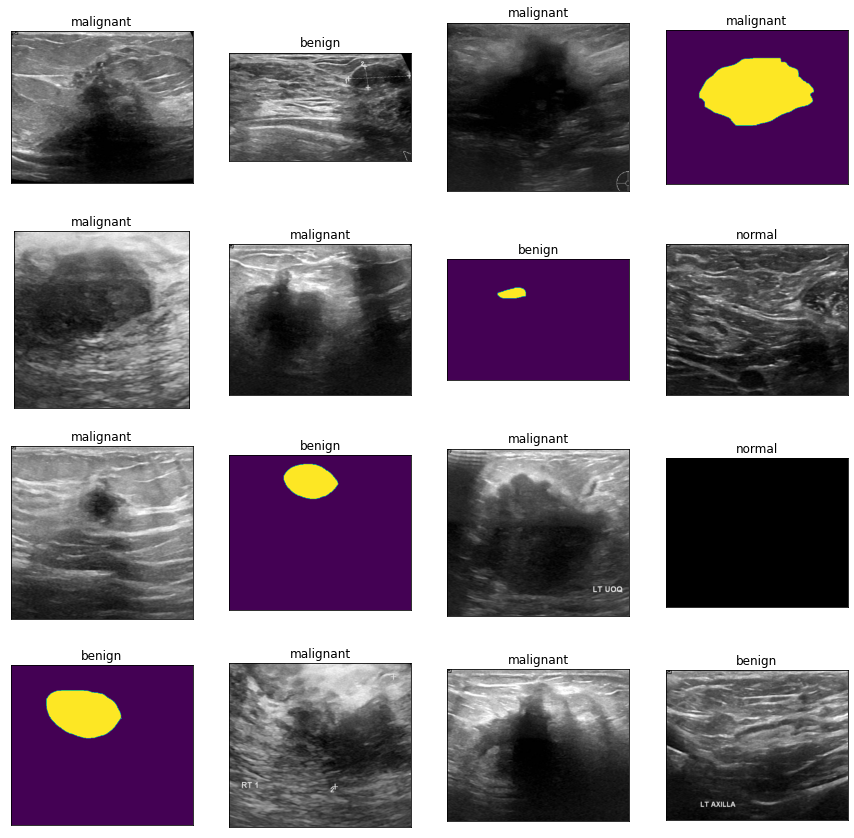

In [38]:
plt.figure(figsize=(15,15))

for i in range(20):
    plt.subplot(4,4,i+1)
    random_class = random.choice(class_names)
    img = plt.imread(random.choice(list(data_dir.glob(random_class+"/*.png"))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

# **Building the CNN Model**